# 🟠 TP1 | Projeto de Bloco: Inteligência Artificial e Machine Learning

**Objetivo:** Este projeto propõe uma experiência prática em Inteligência Artificial (IA) e Machine Learning (ML), permitindo a aplicação de conceitos e técnicas adquiridos em disciplinas regulares num contexto de dados reais.

Base de dados: https://www.kaggle.com/competitions/titanic

## ⤵️ Imports

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## 🎲 Carregamento de Dados

In [ ]:
prod_data = pd.read_csv('/content/drive/MyDrive/2026/2026 01/5 -  Projeto de Bloco: Engenharia de Dados: Big Data/TP1/test.csv')
train_data = pd.read_csv('/content/drive/MyDrive/2026/2026 01/5 -  Projeto de Bloco: Engenharia de Dados: Big Data/TP1/train.csv')

In [ ]:
prod_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### 📍 Identifique as características (features) e o alvo (target) nos conjuntos de dados, compreendendo sua estrutura e importância.

🗣️ De modo geral, ambas as bases (train e test) são semelhantes, onde encontramos, apenas no dataset de treno, a coluna `survived`. **Este é o nosso target!**

As demais colunas são as nossas features:
- PassengerId -> ID do passageiro
- Pclass -> Categoria da passagem _(1 classe, 2 classe, 3 classe)_
- Name -> Nome do passageiro
- Sex -> Gênero
- Age -> Idade _(em anos)_
- SibSp -> Número de crianças por família
- Parch -> Número de pais por crianças
- Ticket -> Número da passagem
- Fare -> Valor pago
- Cabin -> Número do quarto
- Embarket -> Cidade onde embarcou _(C = Cherbourg, Q = Queenstown, S = Southampton)_

##⏳ Divisão de Dados

In [ ]:
train_f, test_f, train_t, test_t = train_test_split(train_data, train_data['Survived'], test_size=0.2, stratify=train_data['Survived'], random_state=42)

In [ ]:
print(train_f.shape)
print(train_t.shape)

print(test_f.shape)
print(test_t.shape)

(712, 12)
(712,)
(179, 12)
(179,)


##💡 Transformação de Dados

In [ ]:
# Remoção de colunas irrelevantes
train_f = train_f.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'])
test_f = test_f.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'])

categorical_columns = ['Sex', 'Embarked']

In [ ]:
train_f.isna().sum()

,0
Pclass,0
Sex,0
Age,137
SibSp,0
Parch,0
Fare,0
Embarked,2


In [ ]:
# Preenchendo os valores NaN de 'Age' com a média dos valores
train_f['Age'] = train_f['Age'].fillna(train_f['Age'].mean())
test_f['Age'] = test_f['Age'].fillna(train_f['Age'].mean())

# Preenchendo os valores NaN de 'E,barked' com a moda dos valores
train_f['Embarked'] = train_f['Embarked'].fillna(train_f['Embarked'].mode()[0])
test_f['Embarked'] = test_f['Embarked'].fillna(train_f['Embarked'].mode()[0])

In [ ]:
train_f.isna().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
encoder = OneHotEncoder(sparse_output=False)


encoder.fit(train_f[categorical_columns])

train_encoded = encoder.transform(train_f[categorical_columns])
train_encoded = pd.DataFrame(
    train_encoded,
    columns=encoder.get_feature_names_out(categorical_columns),
    index=train_f.index
)

train_f = pd.concat([train_f.drop(columns=categorical_columns), train_encoded], axis=1)


test_encoded = encoder.transform(test_f[categorical_columns])
test_encoded = pd.DataFrame(
    test_encoded,
    columns=encoder.get_feature_names_out(categorical_columns),
    index=test_f.index
)

test_f = pd.concat([test_f.drop(columns=categorical_columns), test_encoded], axis=1)

In [ ]:
train_f.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
692,3,29.807687,0,0,56.4958,0.0,1.0,0.0,0.0,1.0
481,2,29.807687,0,0,0.0000,0.0,1.0,0.0,0.0,1.0
527,1,29.807687,0,0,221.7792,0.0,1.0,0.0,0.0,1.0
855,3,18.000000,0,1,9.3500,1.0,0.0,0.0,0.0,1.0
801,2,31.000000,1,1,26.2500,1.0,0.0,0.0,0.0,1.0


In [ ]:
scaler = StandardScaler()

scaler = scaler.fit(train_f[train_f.columns])

normed_train_f = scaler.transform(train_f[train_f.columns])
normed_test_f = scaler.transform(test_f[test_f.columns])

In [ ]:
normed_train_f

array([[ 8.29567547e-01, -5.46322934e-16, -4.65084276e-01, ...,
        -4.92527052e-01, -2.89333460e-01,  6.11978247e-01],
       [-3.70944838e-01, -5.46322934e-16, -4.65084276e-01, ...,
        -4.92527052e-01, -2.89333460e-01,  6.11978247e-01],
       [-1.57145722e+00, -5.46322934e-16, -4.65084276e-01, ...,
        -4.92527052e-01, -2.89333460e-01,  6.11978247e-01],
       ...,
       [ 8.29567547e-01,  1.39877270e+00,  4.78334541e-01, ...,
        -4.92527052e-01, -2.89333460e-01,  6.11978247e-01],
       [-1.57145722e+00,  1.32188459e+00, -4.65084276e-01, ...,
        -4.92527052e-01, -2.89333460e-01,  6.11978247e-01],
       [-1.57145722e+00, -5.46322934e-16, -4.65084276e-01, ...,
        -4.92527052e-01, -2.89333460e-01,  6.11978247e-01]])

## 💪🏼 Modelagem de K-Nearest Neighbors (KNN) + Avaliação de Modelos + Análise de Parâmetros

In [ ]:
# weights
weights_list = [
  'uniform', 'distance'
]

In [ ]:
results = []

for k in range(1, 16):
  for w in weights_list:
    knn = KNeighborsClassifier(
        n_neighbors=k,
        weights=w,
        metric='minkowski'
    )
    knn = knn.fit(normed_train_f, train_t)

    train_t_predicted = knn.predict(normed_train_f)
    train_acc = accuracy_score(train_t_predicted, train_t)

    test_t_predicted = knn.predict(normed_test_f)
    test_acc = accuracy_score(test_t_predicted, test_t)

    results.append({
        'n_neighbors': k,
        'weights': w,
        'train_acc': train_acc,
        'test_acc': test_acc
    })

In [ ]:
results = pd.DataFrame(results)
results.sort_values('test_acc', ascending=False).head(10)

,n_neighbors,weights,train_acc,test_acc
11,6,distance,0.983146,0.837989
13,7,distance,0.983146,0.837989
23,12,distance,0.983146,0.837989
29,15,distance,0.983146,0.837989
27,14,distance,0.983146,0.832402
15,8,distance,0.983146,0.832402
26,14,uniform,0.839888,0.826816
28,15,uniform,0.832865,0.826816
17,9,distance,0.983146,0.826816
25,13,distance,0.983146,0.826816


<Axes: xlabel='n_neighbors'>

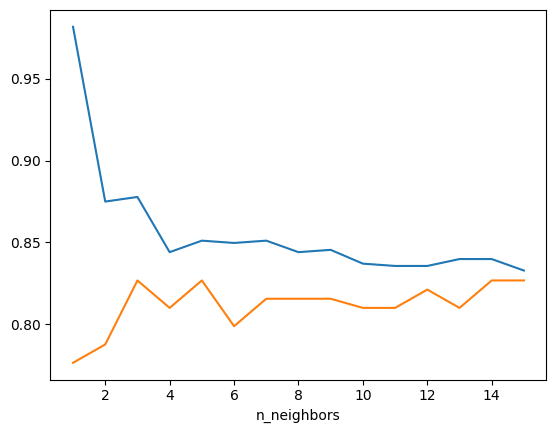

In [ ]:
w = 'uniform'
results[results.weights == w].set_index('n_neighbors').train_acc.plot()
results[results.weights == w].set_index('n_neighbors').test_acc.plot()

<Axes: xlabel='n_neighbors'>

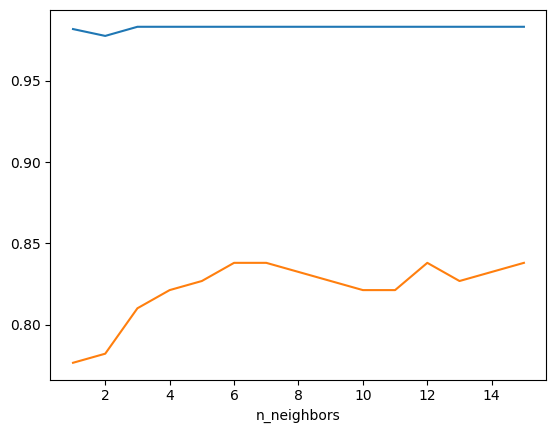

In [ ]:
w = 'distance'
results[results.weights == w].set_index('n_neighbors').train_acc.plot()
results[results.weights == w].set_index('n_neighbors').test_acc.plot()

🗣️ Após realizar a análise de valores do parãmetro K, onde foi o range testado foi de 1 até 15, identificamos que **o melhor valor é k = 6, atingindo uma acurácio de 83,79%.**

Além disso, também testamos os valores de weight (distance e uniform), onde atingimos a máxima acurácia descrita acima com o valor distance.